# Lab 3 Solution

In [116]:
# the imports:

# pandas for handling the data
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# Seaborn is a Python data visualization library that offers a user-friendly interface 
#    for generating visually appealing and informative statistical graphics.
import seaborn as sns

# From sklearn we import some classes and functions for data handling, the tree classifier, 
#    the accuracy and the plot function to depict the tree  
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.tree import plot_tree 

# This class we use it to search exhaustive over specified parameter values for an estimator.
from sklearn.model_selection import GridSearchCV 

1. Import with pandas the file *iris_teach_2.csv* into the pandas DataFrame with the name *df_iris*. 

In [173]:
df_iris = pd.read_csv('iris_teach_2.csv')
print(df_iris.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  iris_name  
0    setosa  
1    setosa  
2    setosa  
3    setosa  
4    setosa  


2. use the method *isnull()* from the class DataFrame to check if there are empty cells in the dataset. (Hint: check the documentation and use this method with respect to your DataFrame object; use the method .sum() to the result to count the empty cells on columns)

In [174]:
df_iris.isna().sum()

sepal length (cm)    1
sepal width (cm)     1
petal length (cm)    0
petal width (cm)     1
iris_name            1
dtype: int64

3. We see that we have some empty cells on some rows. Delete these rows (hint: use the method *dropna()* from pandas.DataFrame class, with the argument *inplace=True*). Check the documentation why we use that argument (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)! 

In [175]:
df_iris.dropna(inplace=True)
df_iris.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
iris_name            0
dtype: int64

4. Divide the dataset in two parts: a set **X** for features and **y** for target. 

In [176]:
# X = np.array([df_iris['sepal length (cm)'], df_iris['sepal width (cm)'], df_iris['petal length (cm)'], df_iris['petal width (cm)']])
# y = np.array(df_iris['iris_name'])

# Separate the data into X and y
X = df_iris.drop('iris_name', axis=1)
y = df_iris['iris_name']

print(X.head())
print(y.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: iris_name, dtype: object


5. Create a **LabelEncoder** object to encode the classes from the target. Fit it with the *y* list, and encode *y* with it. (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder)

In [177]:
# create LabelEncoder object
le = LabelEncoder()

# fit and transform the target variable
y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

6. Divide the dataset in a training and a testing set as we did it in the previous laboratory with the sklearn function *train_test_split*. Check the documentation why we use for *random_state* a fixed value here! (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

7. Drop the *petal width* column from the database and create a decision tree in a similar way with the example.
8. Find the proper depth and evaluate the score for the decision tree model that you build.

Accuracy: 0.95
Best hyperparameters: {'max_depth': 2}


[Text(0.4, 0.8333333333333334, 'X[2] <= 2.45\nentropy = 1.583\nsamples = 112\nvalue = [35, 39, 38]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.6, 0.5, 'X[2] <= 4.75\nentropy = 1.0\nsamples = 77\nvalue = [0, 39, 38]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.187\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.527\nsamples = 42\nvalue = [0, 5, 37]')]

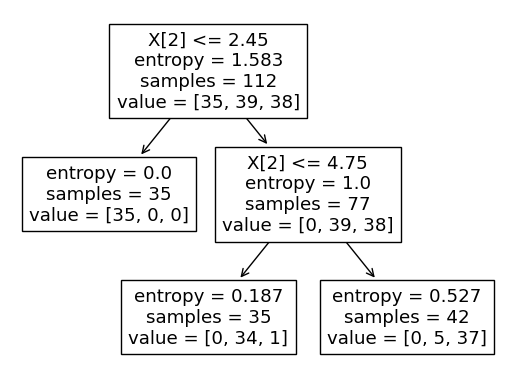

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.tree import plot_tree 
from sklearn.model_selection import GridSearchCV 


df_iris = pd.read_csv('iris_teach_2.csv')
df_iris.dropna(inplace=True)

X = df_iris.drop('iris_name', axis=1)
y = df_iris['iris_name']

le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)



# drop the petal width column from the feature set
X_train = X_train.drop('petal width (cm)', axis=1)
X_test = X_test.drop('petal width (cm)', axis=1)

# create a decision tree classifier
tree_clf = DecisionTreeClassifier(criterion='entropy', random_state=42) 
# fit the classifier to the training data
tree_clf.fit(X_train, y_train)
# make predictions on the test set 
y_pred = tree_clf.predict(X_test) 
# calculate the accuracy of the model 
accuracy = accuracy_score(y_test, y_pred) 
print("Accuracy: {:.2f}".format(accuracy))


# define the hyperparameters to search over 
param_grid = {"max_depth": range(1,7)} 
# create a grid search object 
grid_search = GridSearchCV(tree_clf, param_grid, cv=5) 
# fit the grid search object to the training data 
grid_search.fit(X_train, y_train) 
# print the best hyperparameters found by the grid search 
print("Best hyperparameters:", grid_search.best_params_)
# create a new decision tree classifier object with the best hyperparameters 
tree_clf_tuned = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42) 
# fit the classifier to the training data 
tree_clf_tuned.fit(X_train, y_train)
# visualize the decision tree 
plot_tree(tree_clf_tuned)